# Mask grids with shapefiles

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import pyogrio

from polartoolkit import fetch, maps, regions, utils

In [2]:
# fetch a grid
grid = fetch.bedmap2(
    layer="surface",
    spacing=10e3,
)

# fetch a shapefile
shapefile = fetch.groundingline(version="depoorter-2013")

# get just the grounding line
gdf = pyogrio.read_dataframe(shapefile)
groundingline = gdf[gdf.Id_text == "Grounded ice or land"]

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.


grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


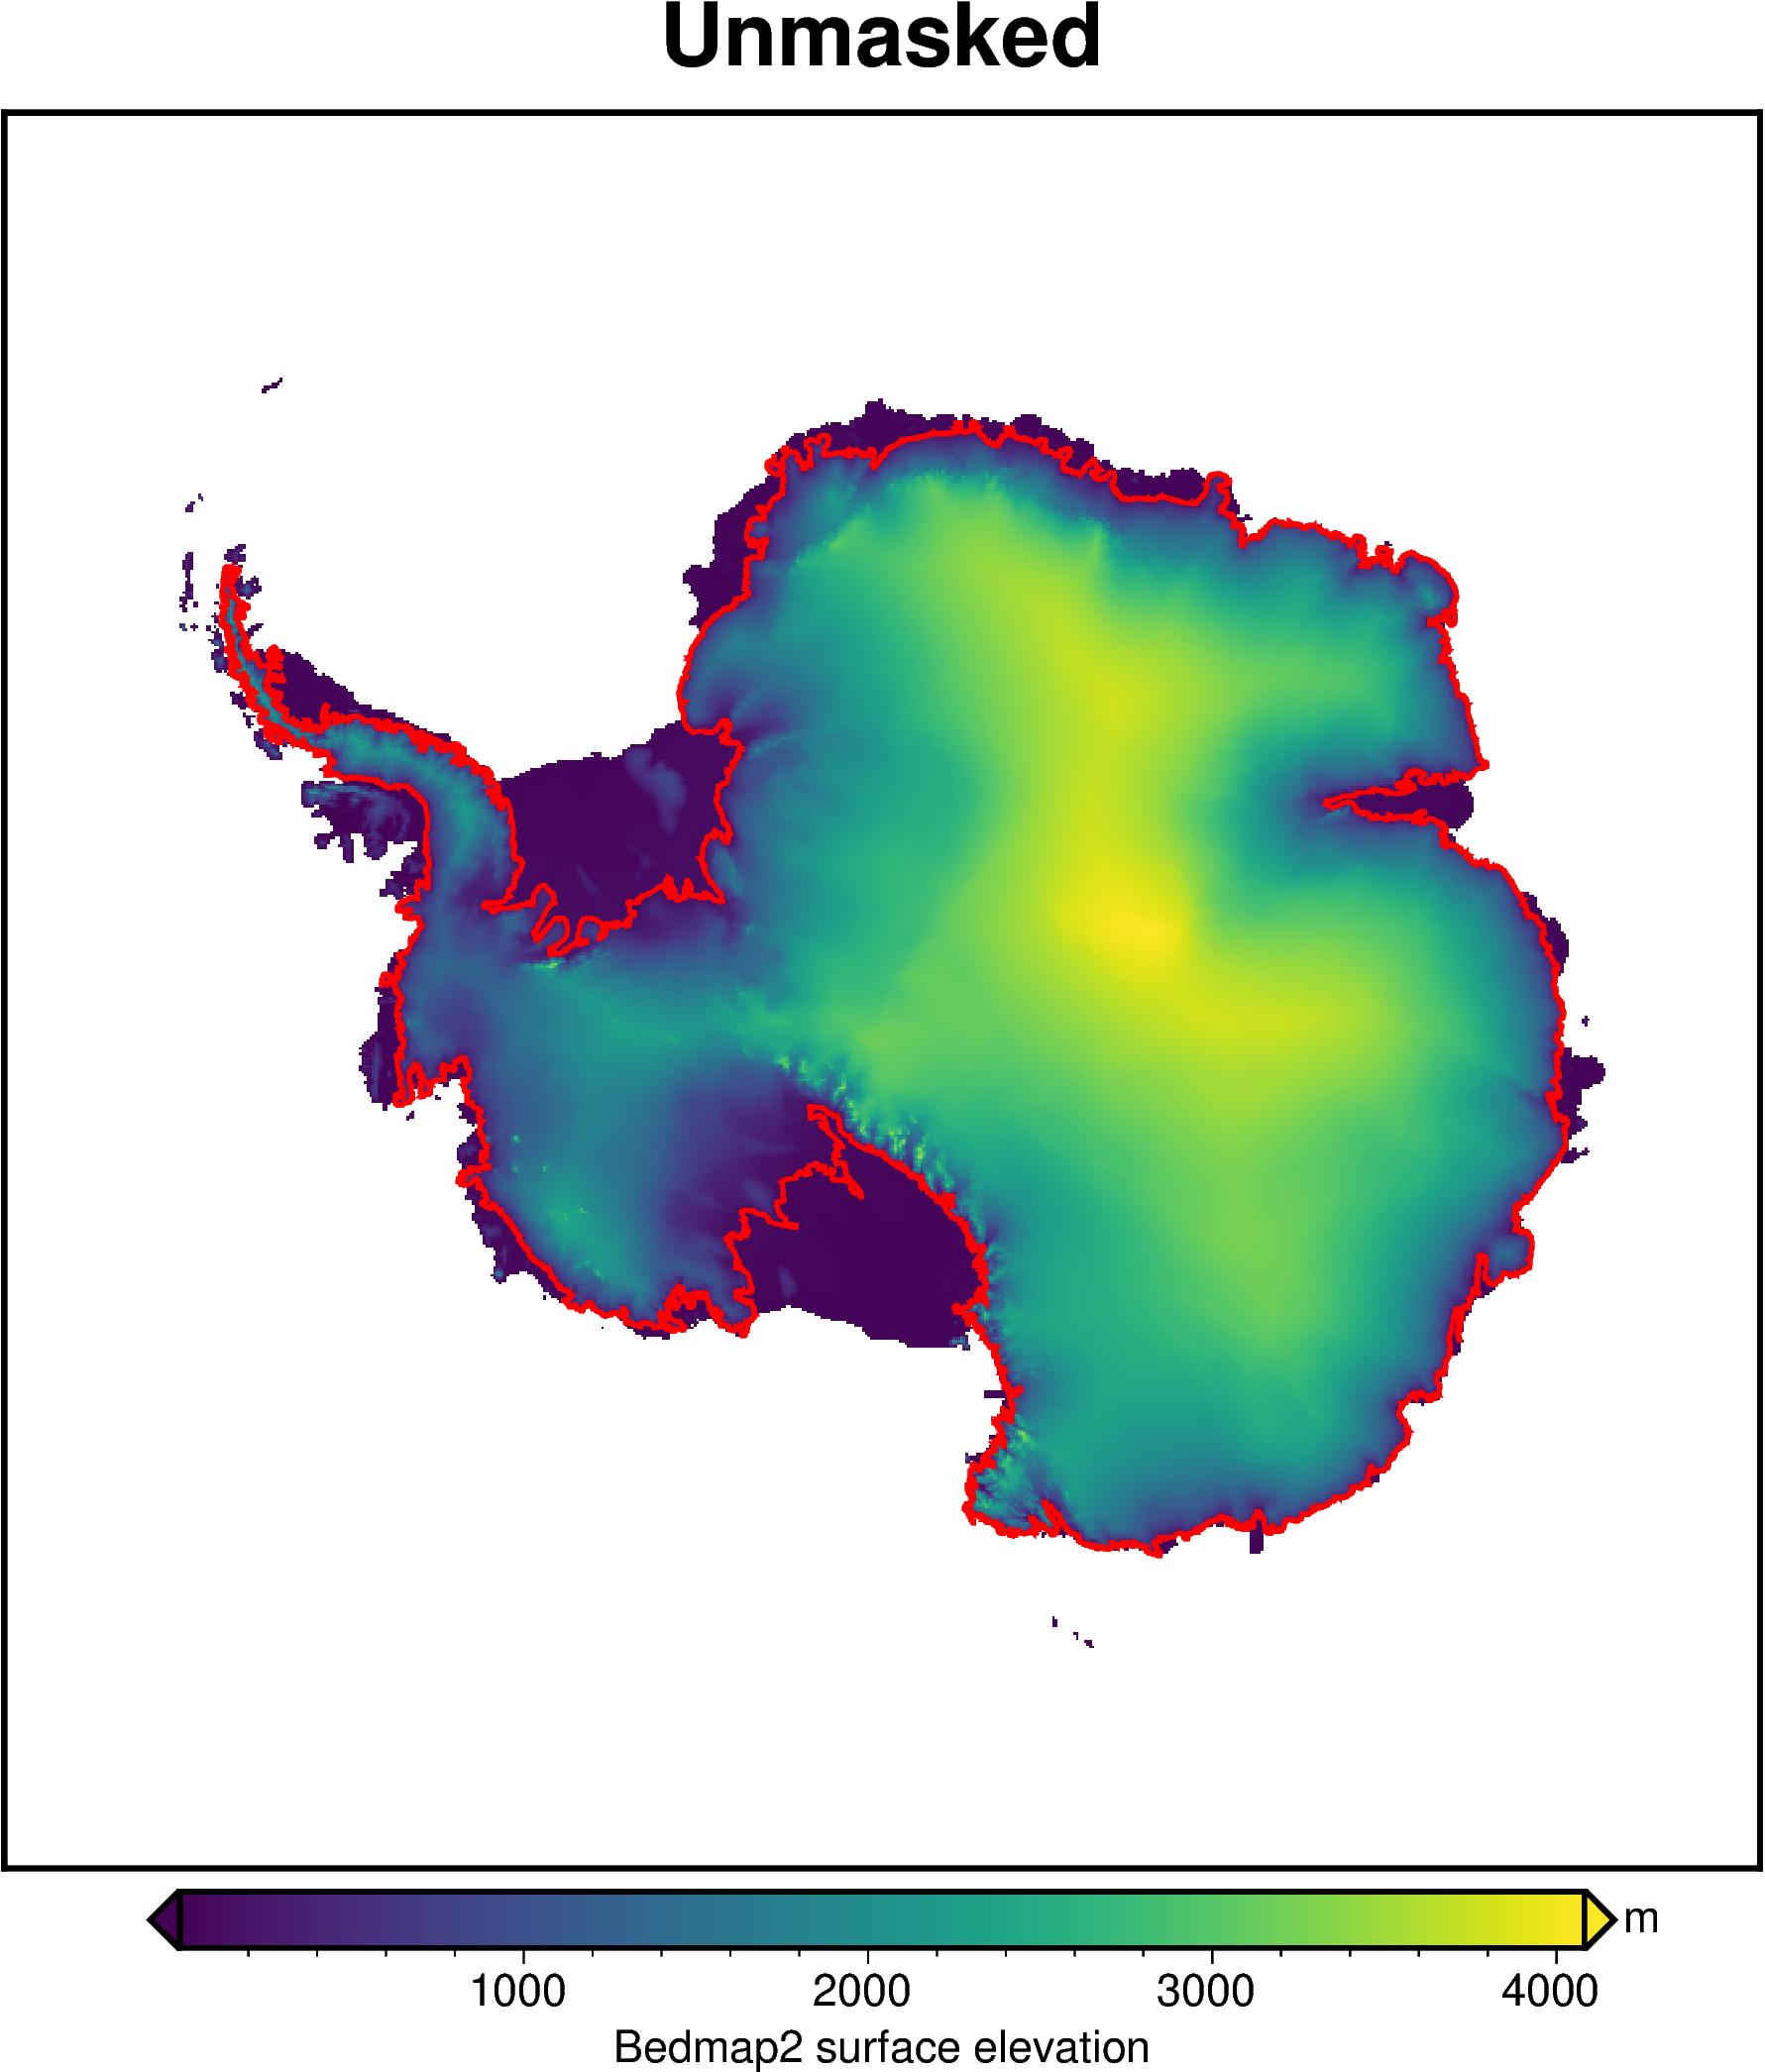

In [3]:
# plot the grid
fig = maps.plot_grd(
    grid,
    title="Unmasked",
    cbar_label="Bedmap2 surface elevation",
    cbar_unit="m",
)

# plot the shapefile
fig.plot(groundingline, pen="1p,red")

# show the plot
fig.show()

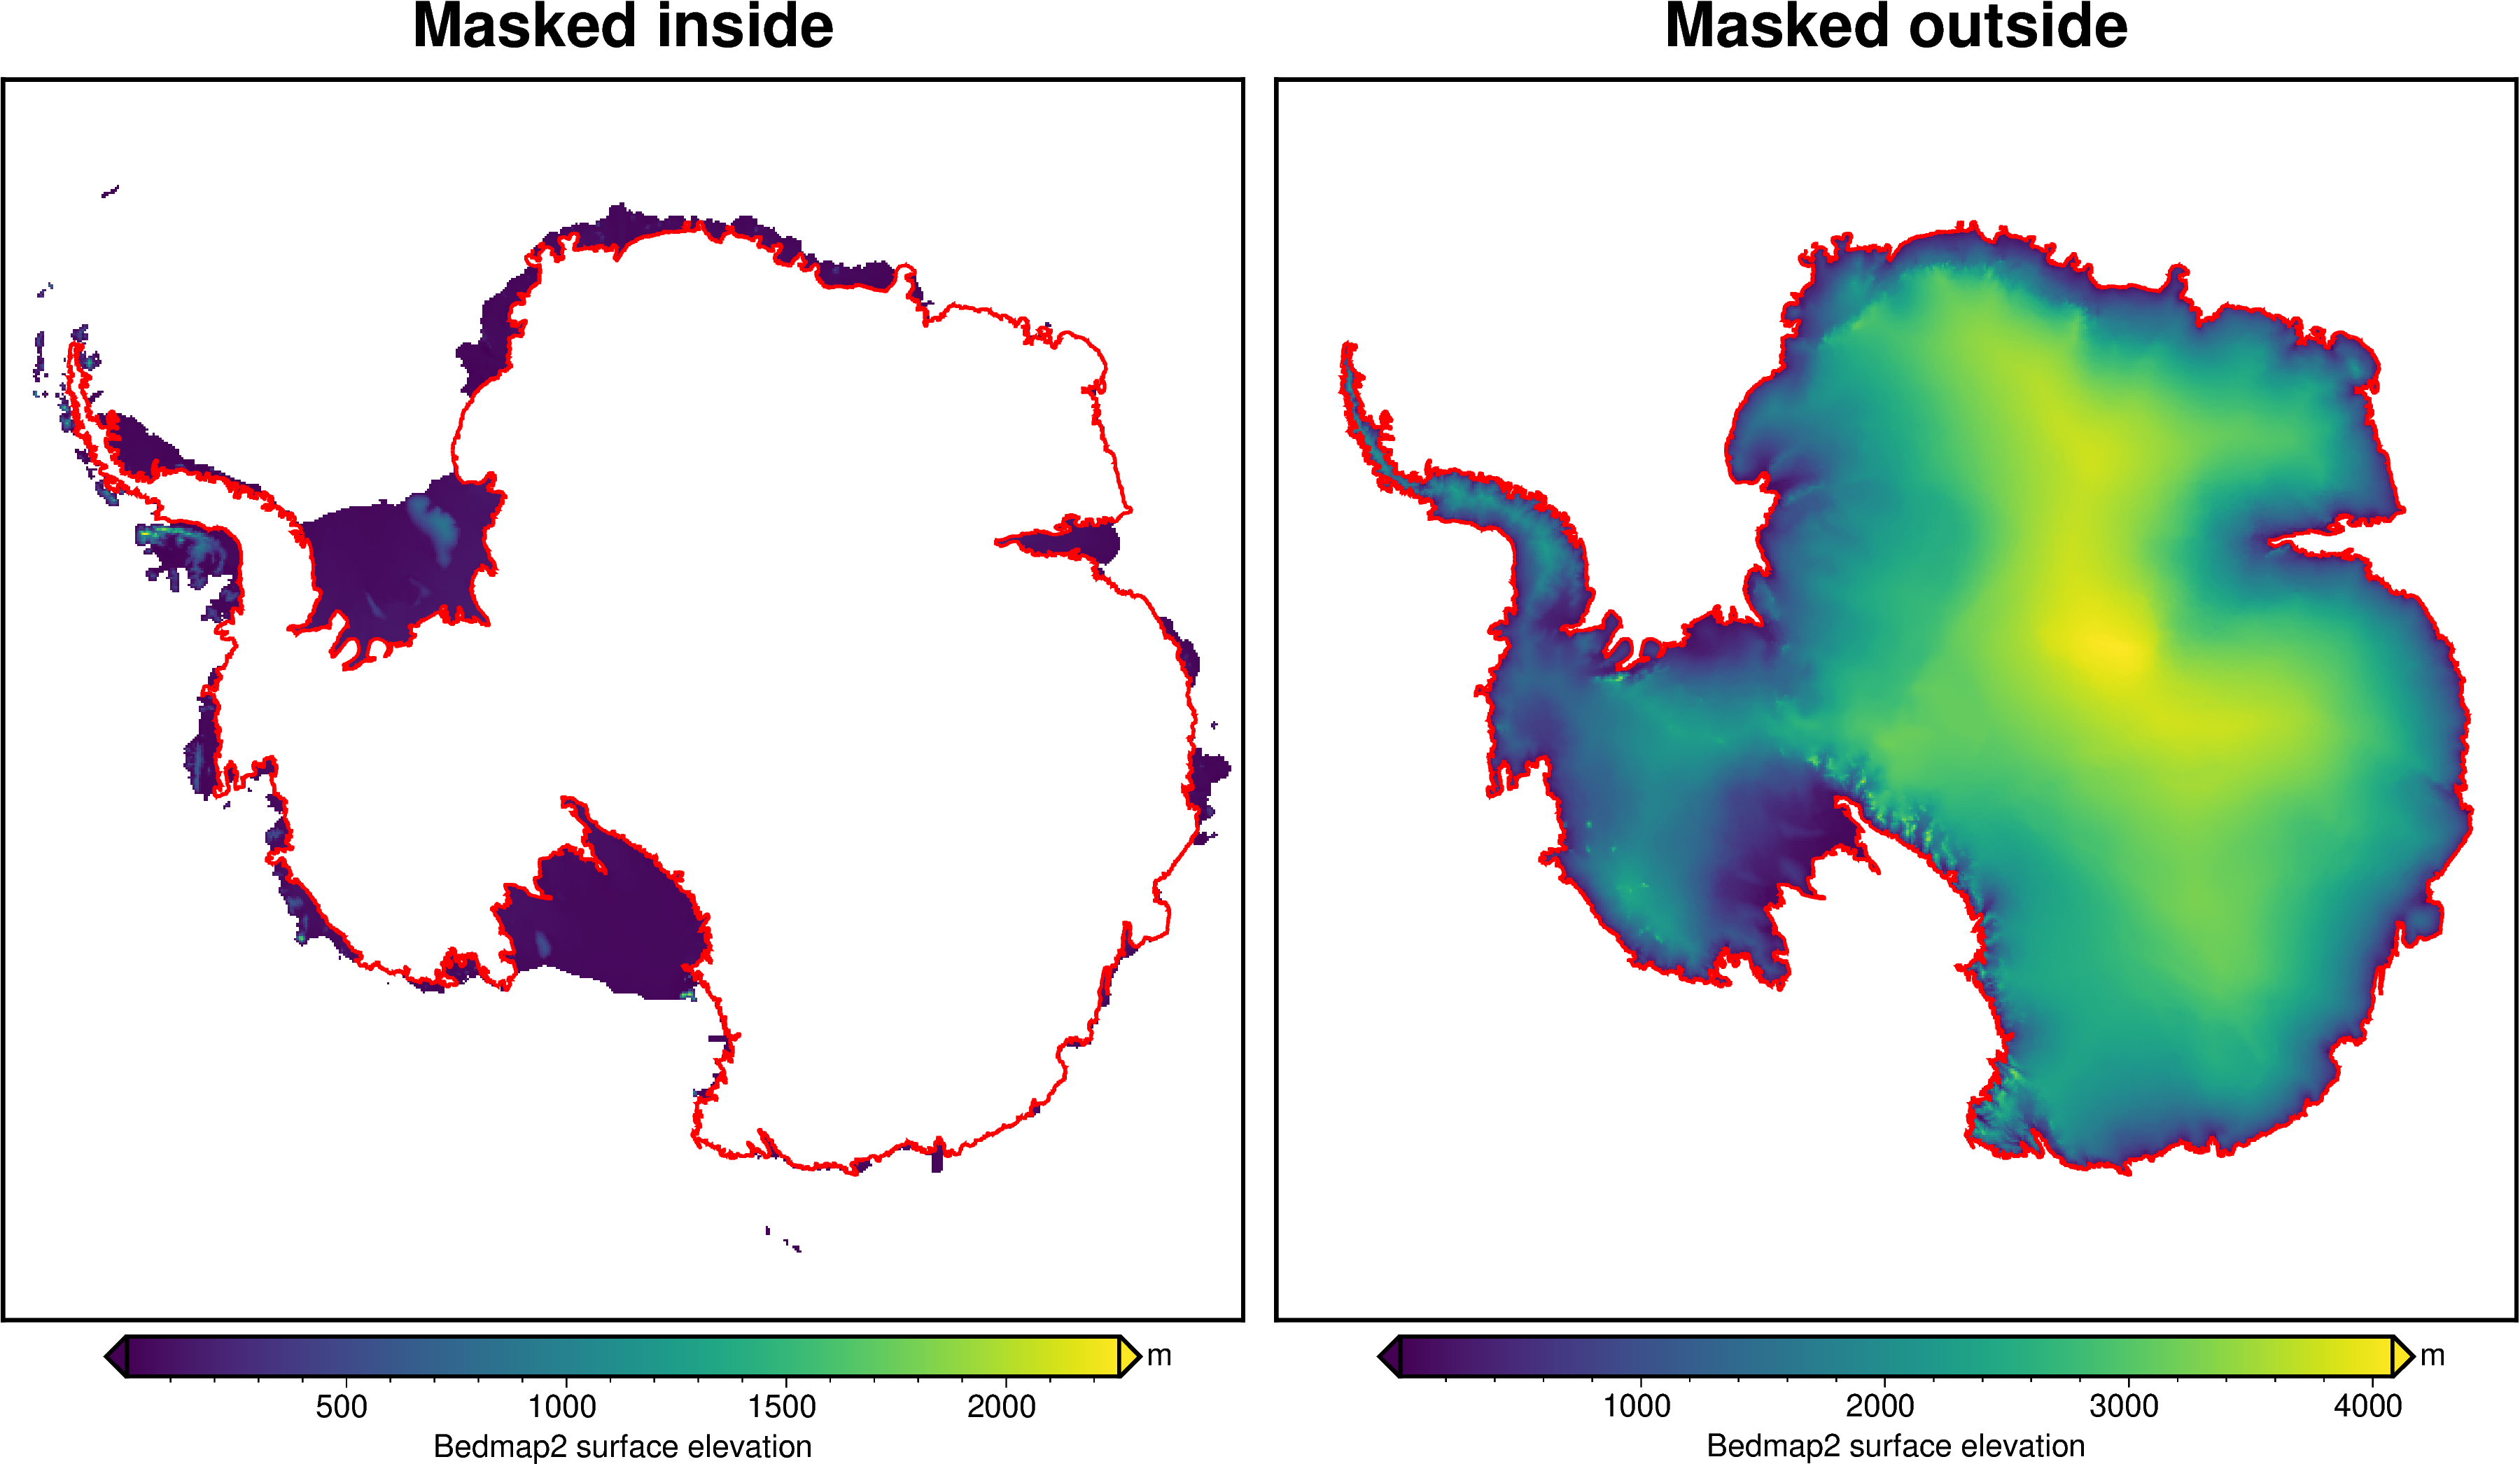

In [4]:
# mask the inside region
masked_inside = utils.mask_from_shp(shapefile=groundingline, xr_grid=grid, masked=True)

# mask the outside region
masked_outside = utils.mask_from_shp(
    shapefile=groundingline, xr_grid=grid, masked=True, invert=False
)

# plot the inside-masked grid
fig = maps.plot_grd(
    masked_inside,
    title="Masked inside",
    cbar_label="Bedmap2 surface elevation",
    cbar_unit="m",
    region=regions.antarctica,
)
# plot the shapefile
fig.plot(groundingline, pen="1p,red")

# plot the outside-masked grid
fig = maps.plot_grd(
    masked_outside,
    title="Masked outside",
    cbar_label="Bedmap2 surface elevation",
    cbar_unit="m",
    region=regions.antarctica,
    fig=fig,
    origin_shift="xshift",
)
# plot the shapefile
fig.plot(groundingline, pen="1p,red")


# show the plot
fig.show()